In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn

In [2]:
sns.set()

In [3]:
df = pd.read_csv('wages.csv')

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


In [6]:
df.nunique()

wage       449
hours       37
IQ          80
educ        10
exper       22
tenure      23
age         11
married      2
black        2
meduc       19
feduc       18
dtype: int64

In [7]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [8]:
for i in ['black', 'married', 'educ']:
    print( df[i].value_counts())


0    815
1    120
Name: black, dtype: int64
1    835
0    100
Name: married, dtype: int64
12    393
16    150
13     85
14     77
18     57
15     45
11     43
17     40
10     35
9      10
Name: educ, dtype: int64


In [9]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [10]:
df.isnull().sum()

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [11]:
df.isnull().sum()/len(df)

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

In [12]:
df.nunique()

wage       449
hours       37
IQ          80
educ        10
exper       22
tenure      23
age         11
married      2
black        2
meduc       19
feduc       18
dtype: int64

In [13]:
categorical =['married', 'black']
for col in categorical:
    df[col]=df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 67.9 KB


In [15]:
list(df.drop(['black', 'married'], axis=1).columns)

['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc', 'feduc']

In [16]:
numerics = list(df.drop(['black', 'married'], axis=1).columns)
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 67.9 KB


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wage,935.0,957945.454545,404360.822474,115000.0,669000.0,905000.0,1160000.0,3078000.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0
feduc,741.0,10.217274,3.300700,0.0,8.0,10.0,12.0,18.0


In [19]:
df.isnull().sum()/len(df)

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

In [20]:
df['meduc'].isna().sum()

78

In [21]:
df.drop(['feduc'], axis=1, inplace=True)

In [22]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

In [23]:
df['meduc'].fillna(df['meduc'].median(), axis=0, inplace=True)

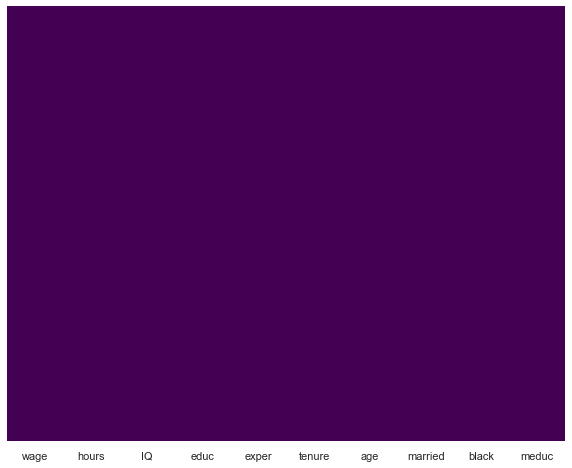

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(2), int64(6)
memory usage: 60.6 KB


<Figure size 720x576 with 0 Axes>

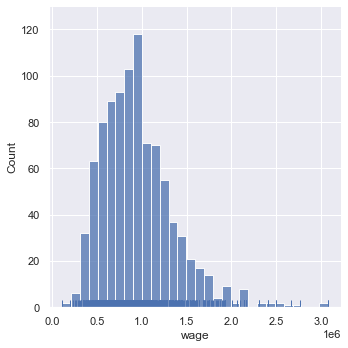

In [26]:
plt.figure(figsize=(10,8))
sns.displot(df['wage'], bins=30, rug=True)
plt.show()

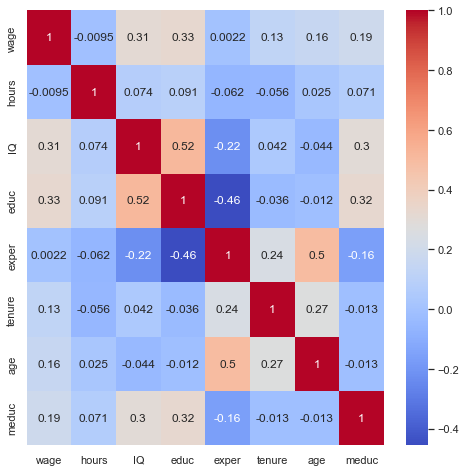

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()
                             

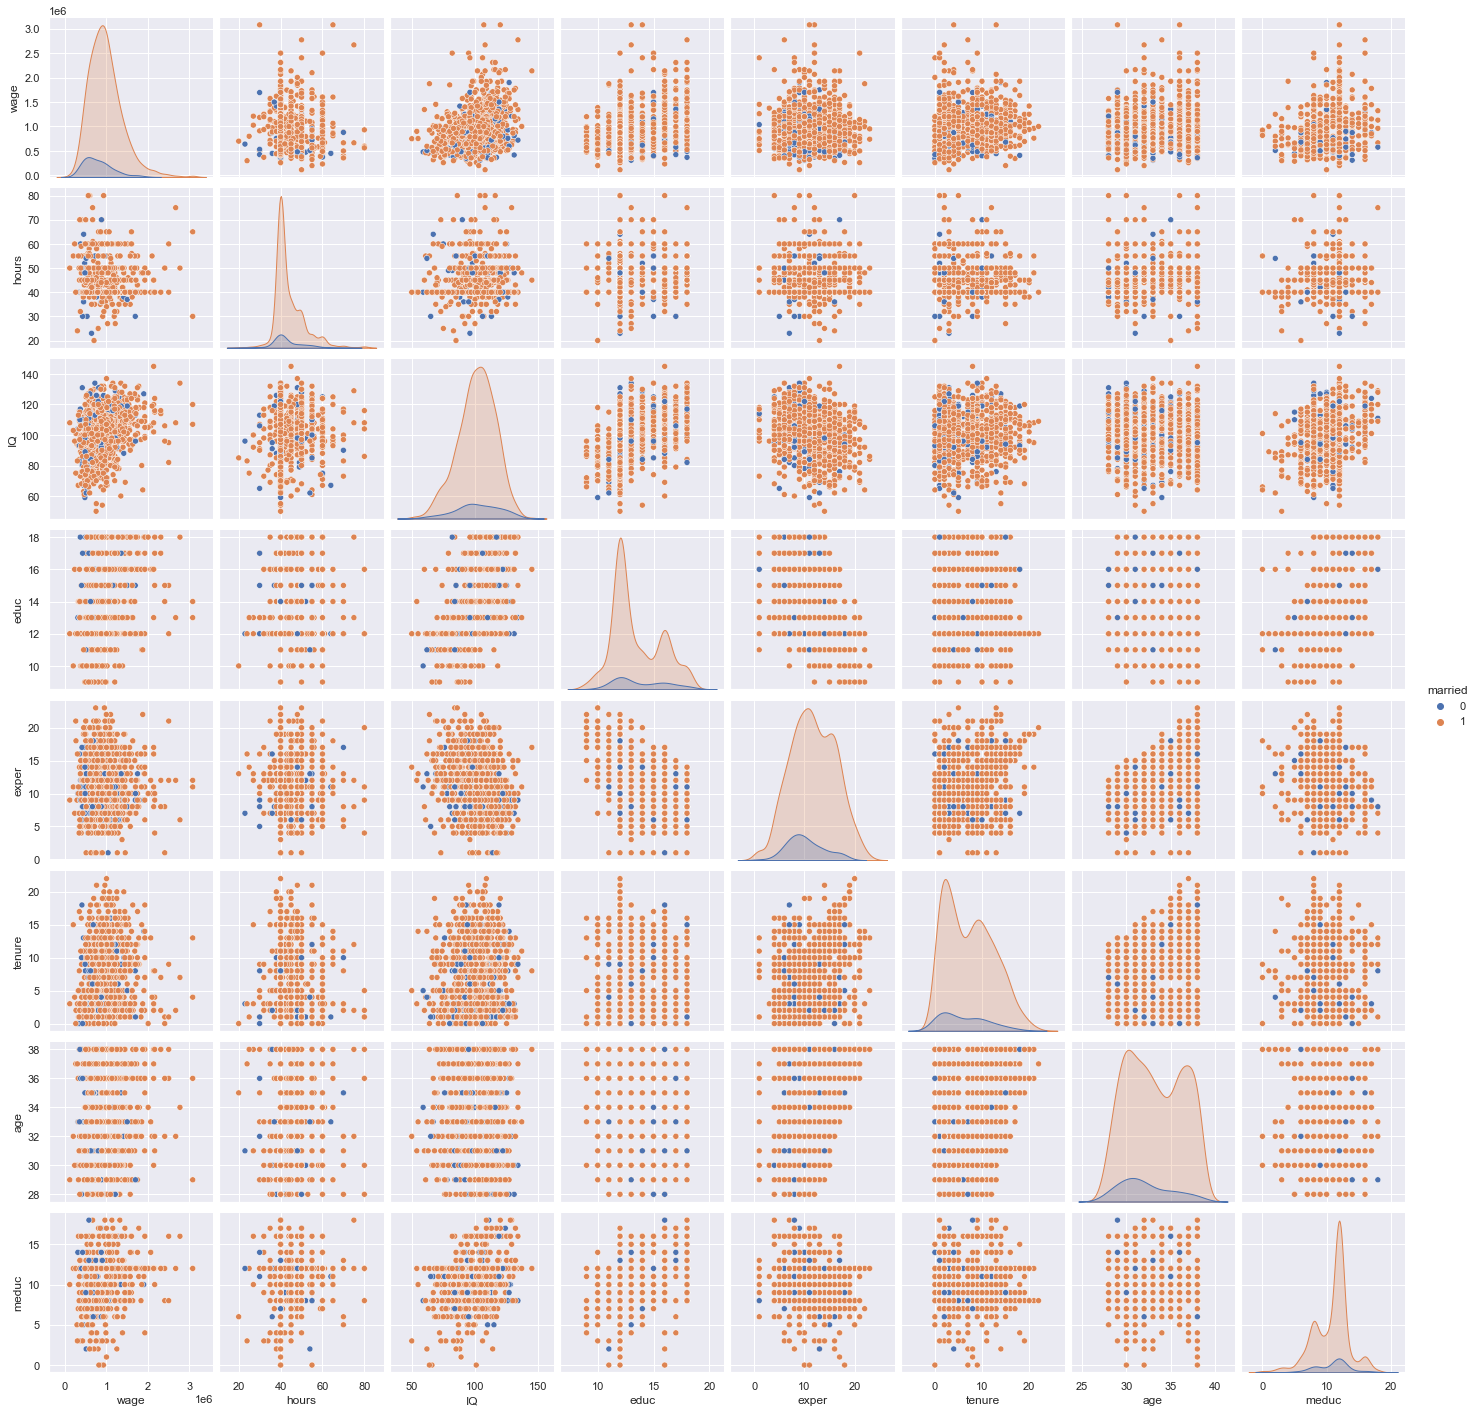

In [40]:
sns.pairplot(df, hue='married')
plt.show()

In [56]:
df_groupby=df[['wage', 'educ','black', 'exper', 'age']].groupby(by=['black']).mean()

In [57]:
df_groupby

,wage,educ,exper,age
black,,,,
0,990647.852761,13.619632,11.469939,33.122699
1,735841.666667,12.441667,12.200000,32.791667


In [ ]:
sns.plot(ysns.barplot(y='wage', x='black', data=df_groupby)
plt.show()='wage', )